In [1]:
import pandas as pd
import numpy as np
import glob
from scipy import stats

In [2]:
print(pd.__version__)

1.4.1


In [3]:
carpeta="data/Only_training_hipotesis_salida/"

In [4]:
def mayorEtiqueta(a,b,c):
    if a > b and a > c:
        return 'entailment'
    elif c > a and c > b:
        return 'contradiction'
    else:
        return 'neutral'

In [5]:
a=glob.glob(carpeta+'p*.pickle')
a[0]

'data/Only_training_hipotesis_salida/pTEST_new_0.2_9.csv.pickle'

In [6]:
df= pd.read_pickle(a[0])
df

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label
0,0,"[NULL{null,PROPN}, a{a,DET}, person{person,NOU...","[NULL{null,PROPN}, a{a,DET}, person{person,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.2037788, 0.01616...","[0.0007424889, 0.0011908361, 0.9980667]","[0.0, 0.0, 1.0]",0,8883,contradiction,contradiction
1,1,"[NULL{null,PROPN}, a{a,DET}, frowning{frown,VE...","[NULL{null,PROPN}, an{an,DET}, angry{angry,ADJ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.020928295, 0.28484765, 0.1438...","[0.009199995, 0.9758755, 0.014924559]","[0.0, 1.0, 0.0]",0,270,neutral,neutral
2,2,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17077179, 0.0161...","[0.027020607, 0.96290016, 0.010079146]","[0.0, 1.0, 0.0]",0,8297,neutral,neutral
3,3,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,PROPN}, the{the,DET}, child{child,N...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.19426414, 0.0403...","[0.06715914, 0.12506096, 0.80777985]","[0.0, 0.0, 1.0]",0,3351,contradiction,contradiction
4,4,"[NULL{null,PROPN}, pretty{pretty,ADJ}, spring{...","[NULL{null,PROPN}, a{a,DET}, person{person,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.2037788, 0.08460...","[0.95283586, 0.039231855, 0.007932238]","[1.0, 0.0, 0.0]",0,2166,entailment,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...
2671,2671,"[NULL{null,PROPN}, a{a,DET}, little{little,ADJ...","[NULL{null,ADJ}, two{two,NUM}, people{people,N...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.16620766, 0.01119...","[0.010369298, 0.0029113367, 0.9867193]","[0.0, 1.0, 0.0]",1,9787,contradiction,neutral
2672,2672,"[NULL{null,ADJ}, two{two,NUM}, gondola{gondola...","[NULL{null,PROPN}, the{the,DET}, two{two,NUM},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.08687423, 0.2151...","[0.030671807, 0.22047296, 0.7488553]","[0.0, 1.0, 0.0]",1,9806,contradiction,neutral
2673,2673,"[NULL{null,ADJ}, two{two,NUM}, gondola{gondola...","[NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.21513091, 0.17841...","[0.00012794005, 0.00055327616, 0.99931884]","[0.0, 0.0, 1.0]",1,9807,contradiction,contradiction
2674,2674,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, we...","[NULL{null,ADJ}, two{two,NUM}, women{woman,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.21101676, 0.01119...","[9.536099e-05, 0.0034259658, 0.99647874]","[0.0, 1.0, 0.0]",1,9812,contradiction,neutral


In [7]:
df.Hipotesis[0]

['NULL{null,PROPN}',
 'a{a,DET}',
 'person{person,NOUN}',
 'is{be,VERB}',
 'sitting{sit,VERB}',
 'in{in,ADP}',
 'a{a,DET}',
 'chair{chair,NOUN}',
 '.{.,PUNCT}']

In [8]:
df.Text[0]

['NULL{null,PROPN}',
 'a{a,DET}',
 'person{person,NOUN}',
 'is{be,VERB}',
 'surfing{surf,VERB}',
 'a{a,DET}',
 'big{big,ADJ}',
 'wave{wave,NOUN}',
 '.{.,PUNCT}']

In [9]:
print(len(df.Hipotesis[0]))
print(len(df.Text[0]))

9
9


In [10]:
m=df.M_Align[0][1:11,1:10]

In [11]:
m

array([[2.6690778e-03, 0.0000000e+00, 1.4831392e-02, 4.2517097e-03,
        2.6111610e-02, 6.5458110e-03, 7.9557104e-03, 0.0000000e+00,
        0.0000000e+00],
       [0.0000000e+00, 3.8512385e+00, 1.9284863e-02, 4.6290681e-01,
        0.0000000e+00, 8.3859128e-01, 1.6430531e-02, 0.0000000e+00,
        0.0000000e+00],
       [0.0000000e+00, 1.8152222e-02, 2.4110836e-03, 1.9864088e-02,
        3.4624161e-03, 2.6345292e-02, 4.4345055e-03, 0.0000000e+00,
        0.0000000e+00],
       [2.6690778e-03, 0.0000000e+00, 1.4831392e-02, 4.2517097e-03,
        2.6111610e-02, 6.5458110e-03, 7.9557104e-03, 0.0000000e+00,
        0.0000000e+00],
       [2.3809828e-04, 1.2225246e+00, 3.6004875e-02, 8.4207660e-01,
        1.8478935e-03, 1.2158756e+00, 5.0242342e-02, 0.0000000e+00,
        0.0000000e+00],
       [1.4346631e-03, 1.0187087e-02, 1.2323747e-02, 1.5054898e-02,
        8.2318867e-03, 2.5401752e-02, 9.5863529e-03, 0.0000000e+00,
        0.0000000e+00],
       [8.9176036e-03, 1.0607548e+00, 1.

In [12]:
import scipy.stats

In [13]:
c=np.corrcoef(m)

In [14]:
c

array([[ 1.        , -0.32066217, -0.13975283,  1.        , -0.28349965,
         0.24329966, -0.28035668, -0.13056054,  0.09438797,  0.47976261],
       [-0.32066217,  1.        ,  0.56415251, -0.32066217,  0.75096628,
         0.2473884 ,  0.73211305,  0.27589774,  0.05813166,  0.15400811],
       [-0.13975283,  0.56415251,  1.        , -0.13975283,  0.96202489,
         0.85238069,  0.96658671,  0.90869206,  0.75198581,  0.13935268],
       [ 1.        , -0.32066217, -0.13975283,  1.        , -0.28349965,
         0.24329966, -0.28035668, -0.13056054,  0.09438797,  0.47976261],
       [-0.28349965,  0.75096628,  0.96202489, -0.28349965,  1.        ,
         0.72477883,  0.99920857,  0.82286224,  0.61277104,  0.11743689],
       [ 0.24329966,  0.2473884 ,  0.85238069,  0.24329966,  0.72477883,
         1.        ,  0.73572314,  0.85640599,  0.93158066,  0.44785224],
       [-0.28035668,  0.73211305,  0.96658671, -0.28035668,  0.99920857,
         0.73572314,  1.        ,  0.84272586

In [15]:
import seaborn as sns

In [16]:
df.Hipotesis[0]

['NULL{null,PROPN}',
 'the{the,DET}',
 'woman{woman,NOUN}',
 'is{be,VERB}',
 'wearing{wear,VERB}',
 'a{a,DET}',
 'dress{dress,NOUN}',
 '.{.,PUNCT}']

In [17]:
df.Text[0]

['NULL{null,PROPN}',
 'a{a,DET}',
 'woman{woman,NOUN}',
 'with{with,ADP}',
 'a{a,DET}',
 'black{black,ADJ}',
 'and{and,CCONJ}',
 'white{white,ADJ}',
 'dress{dress,NOUN}',
 'on{on,ADP}',
 'is{be,VERB}',
 'carrying{carry,VERB}',
 'a{a,DET}',
 'green{green,ADJ}',
 'plastic{plastic,NOUN}',
 'laundry{laundry,NOUN}',
 'basket{basket,NOUN}',
 'in{in,ADP}',
 'front{front,NOUN}',
 'of{of,ADP}',
 'an{an,DET}',
 'apartment{apartment,NOUN}',
 'building{building,NOUN}',
 '.{.,PUNCT}']

<AxesSubplot:>

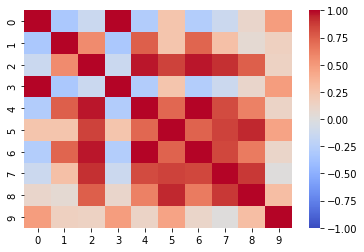

In [18]:
sns.heatmap(c,vmin=-1,vmax=1,cmap="coolwarm")

<AxesSubplot:>

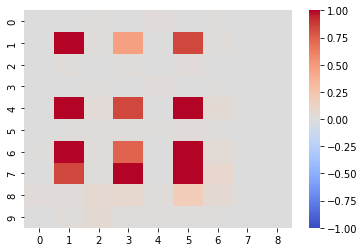

In [19]:
sns.heatmap(m,vmin=-1,vmax=1,cmap="coolwarm")

In [20]:
def normalize_2d(matrix,axis):
    norm = np.linalg.norm(matrix,axis=axis)
    if(axis==1):
        print(norm)
        matrix = matrix.T/norm  # normalized matrix
        return matrix.T
    else:
        matrix = matrix/norm  # normalized matrix
        return matrix

In [21]:
A=np.array([[1,2],[0,4],[5,6]]) 
B=np.array([[1,2,3],[3,4,5]])

In [22]:
np.dot(A,B)

array([[ 7, 10, 13],
       [12, 16, 20],
       [23, 34, 45]])

In [23]:
A

array([[1, 2],
       [0, 4],
       [5, 6]])

In [24]:
normalize_2d(A,1)

[2.23606798 4.         7.81024968]


array([[0.4472136 , 0.89442719],
       [0.        , 1.        ],
       [0.6401844 , 0.76822128]])

In [25]:
sas=pd.read_pickle(a[0])
sas

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label,ma_umbral,target_prediction
0,0,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,PROPN}, the{the,DET}, woman{woman,N...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.17077179, 0.0161...","[0.9661384, 0.01597779, 0.017883748]","[1.0, 0.0, 0.0]",0,2444,entailment,entailment,...,entailment_entailment
1,1,"[NULL{null,ADJ}, children{child,NOUN}, at{at,A...","[NULL{null,ADJ}, children{child,NOUN}, are{be,...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.17383246, 0.011193112, 0.1784...","[0.97667897, 0.019997556, 0.0033234137]","[1.0, 0.0, 0.0]",0,2946,entailment,entailment,...,entailment_entailment
2,2,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, to...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, ha...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1707767, 0.02319...","[0.003093322, 0.049668323, 0.9472383]","[0.0, 0.0, 1.0]",0,3463,contradiction,contradiction,...,contradiction_contradiction
3,3,"[NULL{null,ADJ}, navy{navy,NOUN}, men{man,NOUN...","[NULL{null,ADV}, some{some,DET}, men{man,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.06061026, 0.21513091, 0.01119...","[0.9373359, 0.0519168, 0.010747244]","[1.0, 0.0, 0.0]",0,6025,entailment,entailment,...,entailment_entailment
4,4,"[NULL{null,PROPN}, a{a,DET}, gray{gray,ADJ}, -...","[NULL{null,PROPN}, an{an,DET}, older{old,ADJ},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.020928295, 0.06339521, 0.1707...","[0.01680288, 0.10832323, 0.87487394]","[0.0, 0.0, 1.0]",0,5201,contradiction,contradiction,...,contradiction_contradiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2671,2671,"[NULL{null,PROPN}, a{a,DET}, black{black,ADJ},...","[NULL{null,ADJ}, one{one,NUM}, reward{reward,N...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.103053674, 0.08744241, 0.0140...","[0.01383673, 0.957055, 0.029108273]","[0.0, 1.0, 0.0]",1,9764,neutral,neutral,...,neutral_neutral
2672,2672,"[NULL{null,PROPN}, the{the,DET}, young{young,A...","[NULL{null,PROPN}, a{a,DET}, girl{girl,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17582855, 0.0161...","[0.0022412436, 0.0010637046, 0.99669504]","[0.0, 1.0, 0.0]",1,9783,contradiction,neutral,NOUN VER...,neutral_contradiction
2673,2673,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, dr...","[NULL{null,ADJ}, two{two,NUM}, girl{girl,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.17582855, 0.02498...","[0.003519041, 0.0049149687, 0.99156606]","[1.0, 0.0, 0.0]",1,9784,contradiction,entailment,...,entailment_contradiction
2674,2674,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,PROPN}, the{the,DET}, two{two,NUM},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.08687423, 0.2151...","[0.005355088, 0.056848846, 0.93779606]","[0.0, 0.0, 1.0]",1,9806,contradiction,contradiction,...,contradiction_contradiction


In [26]:
new_data = {'Docs' : [], 'grupo': [],'muestreo': [], 'Total' : [], 'Subtotal' : [], 'E_P' : [], 'eigenvalues' : [],'eigenvectors' : [], 'Paraphrase' : []}
etiquetas=['entailment','neutral','contradiction']
for e in a:
    df=pd.read_pickle(e)
    valores=[0,1]
    for i in valores:
        df_prediction=df[df["Paraphrase"]==i]
        for l1 in etiquetas:
            for l2 in etiquetas:
                new_data['Docs'].append(e)
                new_data['grupo'].append(float(e.split('_')[5])*100)
                new_data['muestreo'].append(e.split('_')[6])    
                subtotal=df_prediction[(df_prediction['gold_label']==l1) & (df_prediction['predicted_label']==l2)].shape[0]
                total=df_prediction[df_prediction['gold_label']==l1].shape[0]
                new_data['Total'].append(total)
                new_data['Subtotal'].append(subtotal)
                new_data['E_P'].append(l1+"_"+l2)
                temp=df_prediction[(df_prediction['gold_label']==l1) & (df_prediction['predicted_label']==l2)].copy()
                l_eigenvalues=[]
                l_eigenvectors=[]
                for index,strings in temp.iterrows():
                    m=strings[5][1:len(strings[1]),1:len(strings[2])]
                    m_norm=np.dot(stats.zscore(np.transpose(m),1),stats.zscore(m))
                    x, v = np.linalg.eig (m_norm)
                    l_eigenvalues.append(x)
                    l_eigenvectors.append(v)
                new_data['eigenvalues'].append(np.array(l_eigenvalues[:]))
                new_data['eigenvectors'].append(np.array(l_eigenvectors[:]))
                new_data['Paraphrase'].append(i)
                l_eigenvalues.clear()
                l_eigenvectors.clear()
dfn=pd.DataFrame(new_data)

/tmp/ipykernel_373131/2097832507.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_data['eigenvalues'].append(np.array(l_eigenvalues[:]))
/tmp/ipykernel_373131/2097832507.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_data['eigenvectors'].append(np.array(l_eigenvectors[:]))
/tmp/ipykernel_373131/2097832507.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [27]:
dfn.to_pickle(carpeta+"eigen/eigenvaluesZSCORE.pickle")

In [28]:
dfn=pd.read_pickle(carpeta+"eigen/eigenvaluesZSCORE.pickle")

In [29]:
dfn

,Docs,grupo,muestreo,Total,Subtotal,E_P,eigenvalues,eigenvectors,Paraphrase
0,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,490,443,entailment_entailment,"[[66.216835, 43.31215, 0.6978874, 4.8367295, 1...","[[[0.055230938, -0.46674123, 0.0768357, 0.1187...",0
1,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,490,38,entailment_neutral,"[[195.87404, 145.47229, 58.276012, 44.38028, 3...","[[[-0.20009227, 0.33416307, -0.0444748, 0.2050...",0
2,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,490,9,entailment_contradiction,"[[61.868637, 33.80616, 26.519415, 10.156754, 8...","[[[-0.17367722, 0.19468534, 0.54949117, 0.2484...",0
3,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,425,54,neutral_entailment,"[[35.765842, 11.669293, 3.9534845, 0.18356471,...","[[[0.16553845, 0.77259964, 0.4678242, -0.17999...",0
4,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,425,339,neutral_neutral,"[[61.567207, 21.035559, 0.5495383, 5.3430758, ...","[[[-0.22102359, -0.83759385, 0.21163768, -0.32...",0
...,...,...,...,...,...,...,...,...,...
2173,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1070,229,neutral_neutral,"[[75.60723, 17.661755, 7.8018823, 2.258884, 4....","[[[-0.34164238, -0.3734793, -0.46254686, 0.135...",1
2174,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1070,779,neutral_contradiction,"[[78.114746, 39.80463, 8.943452, 4.9040885, 0....","[[[-0.4752384, -0.129894, 0.079874925, 0.33883...",1
2175,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1111,49,contradiction_entailment,"[[78.03182, 19.6586, 3.87031, 1.5687858, 0.426...","[[[-0.40391946, 0.031256933, -0.06187074, -0.1...",1
2176,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1111,236,contradiction_neutral,"[[91.99824, 24.41939, 13.454952, 1.7347369, 0....","[[[0.37218776, 0.21707042, 0.7575953, -0.46686...",1


In [30]:
ejemplo1=dfn.eigenvalues[0][0]
ejemplo2=dfn.eigenvalues[0][1]
ejemplo3=dfn.eigenvalues[0][2]

In [31]:
import matplotlib.pyplot as plt
import math

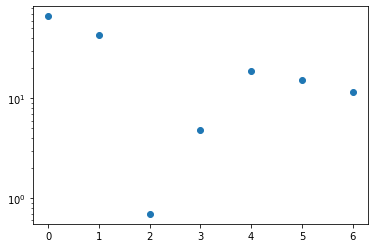

In [32]:
plt.scatter(x=np.arange(len(ejemplo1)),y=ejemplo1)
plt.yscale("log")

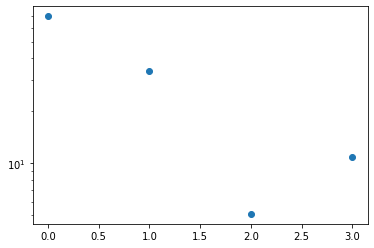

In [33]:
plt.scatter(x=np.arange(len(ejemplo2)),y=ejemplo2)
plt.yscale("log")

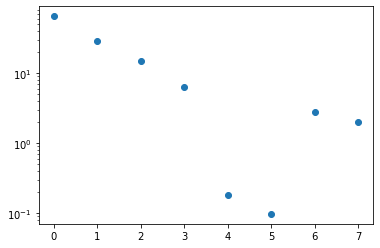

In [34]:
plt.scatter(x=np.arange(len(ejemplo3)),y=ejemplo3)
plt.yscale("log")

In [35]:
a=dfn.eigenvalues[0][4]

In [36]:
a

array([ 3.8821758e+01,  2.3327957e+01,  7.5983853e+00,  1.5740173e+00,
       -3.3828603e-16,  6.7788184e-01], dtype=float32)

In [37]:
lista_eigenvalues=[]

In [38]:
dfn

,Docs,grupo,muestreo,Total,Subtotal,E_P,eigenvalues,eigenvectors,Paraphrase
0,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,490,443,entailment_entailment,"[[66.216835, 43.31215, 0.6978874, 4.8367295, 1...","[[[0.055230938, -0.46674123, 0.0768357, 0.1187...",0
1,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,490,38,entailment_neutral,"[[195.87404, 145.47229, 58.276012, 44.38028, 3...","[[[-0.20009227, 0.33416307, -0.0444748, 0.2050...",0
2,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,490,9,entailment_contradiction,"[[61.868637, 33.80616, 26.519415, 10.156754, 8...","[[[-0.17367722, 0.19468534, 0.54949117, 0.2484...",0
3,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,425,54,neutral_entailment,"[[35.765842, 11.669293, 3.9534845, 0.18356471,...","[[[0.16553845, 0.77259964, 0.4678242, -0.17999...",0
4,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,425,339,neutral_neutral,"[[61.567207, 21.035559, 0.5495383, 5.3430758, ...","[[[-0.22102359, -0.83759385, 0.21163768, -0.32...",0
...,...,...,...,...,...,...,...,...,...
2173,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1070,229,neutral_neutral,"[[75.60723, 17.661755, 7.8018823, 2.258884, 4....","[[[-0.34164238, -0.3734793, -0.46254686, 0.135...",1
2174,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1070,779,neutral_contradiction,"[[78.114746, 39.80463, 8.943452, 4.9040885, 0....","[[[-0.4752384, -0.129894, 0.079874925, 0.33883...",1
2175,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1111,49,contradiction_entailment,"[[78.03182, 19.6586, 3.87031, 1.5687858, 0.426...","[[[-0.40391946, 0.031256933, -0.06187074, -0.1...",1
2176,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1111,236,contradiction_neutral,"[[91.99824, 24.41939, 13.454952, 1.7347369, 0....","[[[0.37218776, 0.21707042, 0.7575953, -0.46686...",1


In [39]:
grupos_box=dfn["grupo"].unique()

In [40]:
eti_box=dfn["E_P"].unique()

In [41]:
for gb in grupos_box:
    for et in eti_box:
        df=dfn[(dfn["grupo"]==gb) & (dfn["E_P"]==et)]
        lista_eigenvalues=[]
        for index,strings in df.iterrows():
            data=strings[6]
            #print(strings["E_P"],strings["grupo"])
            #print(data[0])
            #print(data[1:])
            for i in range(42):
                columna = [float(fila[i]) for fila in data if i < len(fila)]
                #print(columna)
                lista_eigenvalues.append(columna)
            fig2 = plt.figure(figsize=(20,10))
            ax.tick_params(labelsize=10)
            ax.grid(visible=True)
            plt.title("Boxplot eigenvalues "+et+" - "+str(gb),fontsize=30)
            bp0 = sns.boxplot(data=lista_eigenvalues,linewidth=5,palette="Oranges")
            break
        

/tmp/ipykernel_373131/3931257323.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  columna = [float(fila[i]) for fila in data if i < len(fila)]


NameError: name 'ax' is not defined

<Figure size 1440x720 with 0 Axes>

In [ ]:
lista_eigenvalues

[[42.08087,
  62.523476,
  29.60789,
  44.297653,
  92.12063,
  60.607395,
  42.469032,
  119.341385,
  137.86183,
  68.32848,
  72.568115,
  128.8557,
  84.73515,
  60.307728,
  49.487907,
  60.370274,
  36.55351,
  59.729183,
  48.716484,
  53.24939,
  36.488422,
  68.51858,
  34.771606,
  50.36612,
  98.3021,
  50.033985,
  37.76495,
  55.927387,
  66.861534,
  50.58563,
  53.636627,
  131.54169,
  47.412663,
  21.719042,
  40.18985,
  110.28296,
  54.602135,
  39.211994,
  33.709576,
  54.28029,
  68.82015,
  (147.6407+0j),
  74.34464,
  19.12077,
  32.718174,
  94.89795,
  144.18393,
  73.00247,
  63.791763,
  63.51944,
  71.594406,
  65.40456,
  122.21037,
  113.71737,
  35.96813,
  54.093864,
  28.649836,
  67.51706,
  48.720364,
  149.0954,
  71.75541,
  30.414722,
  57.593525,
  64.0102,
  65.64974,
  78.51613,
  77.28594,
  35.65043,
  49.371784,
  91.58573,
  60.141727,
  26.179317,
  25.00515,
  41.824158,
  41.32215,
  104.77101,
  49.932194,
  30.596998,
  55.64651,
  (19

/home/david/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


([<matplotlib.axis.XTick at 0x7efd4478b760>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38'),
  Text(39, 0, '39'),
  Text(40, 0, '40'),
  Text(41, 0, '41')])

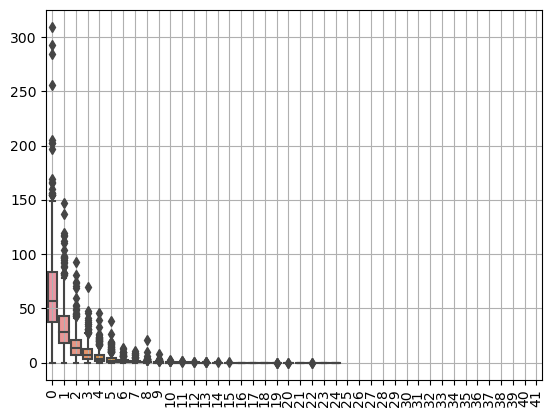

In [ ]:
sns.boxplot(data=lista_eigenvalues)
plt.grid()
plt.xticks(np.arange(42),rotation=90)

/home/david/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


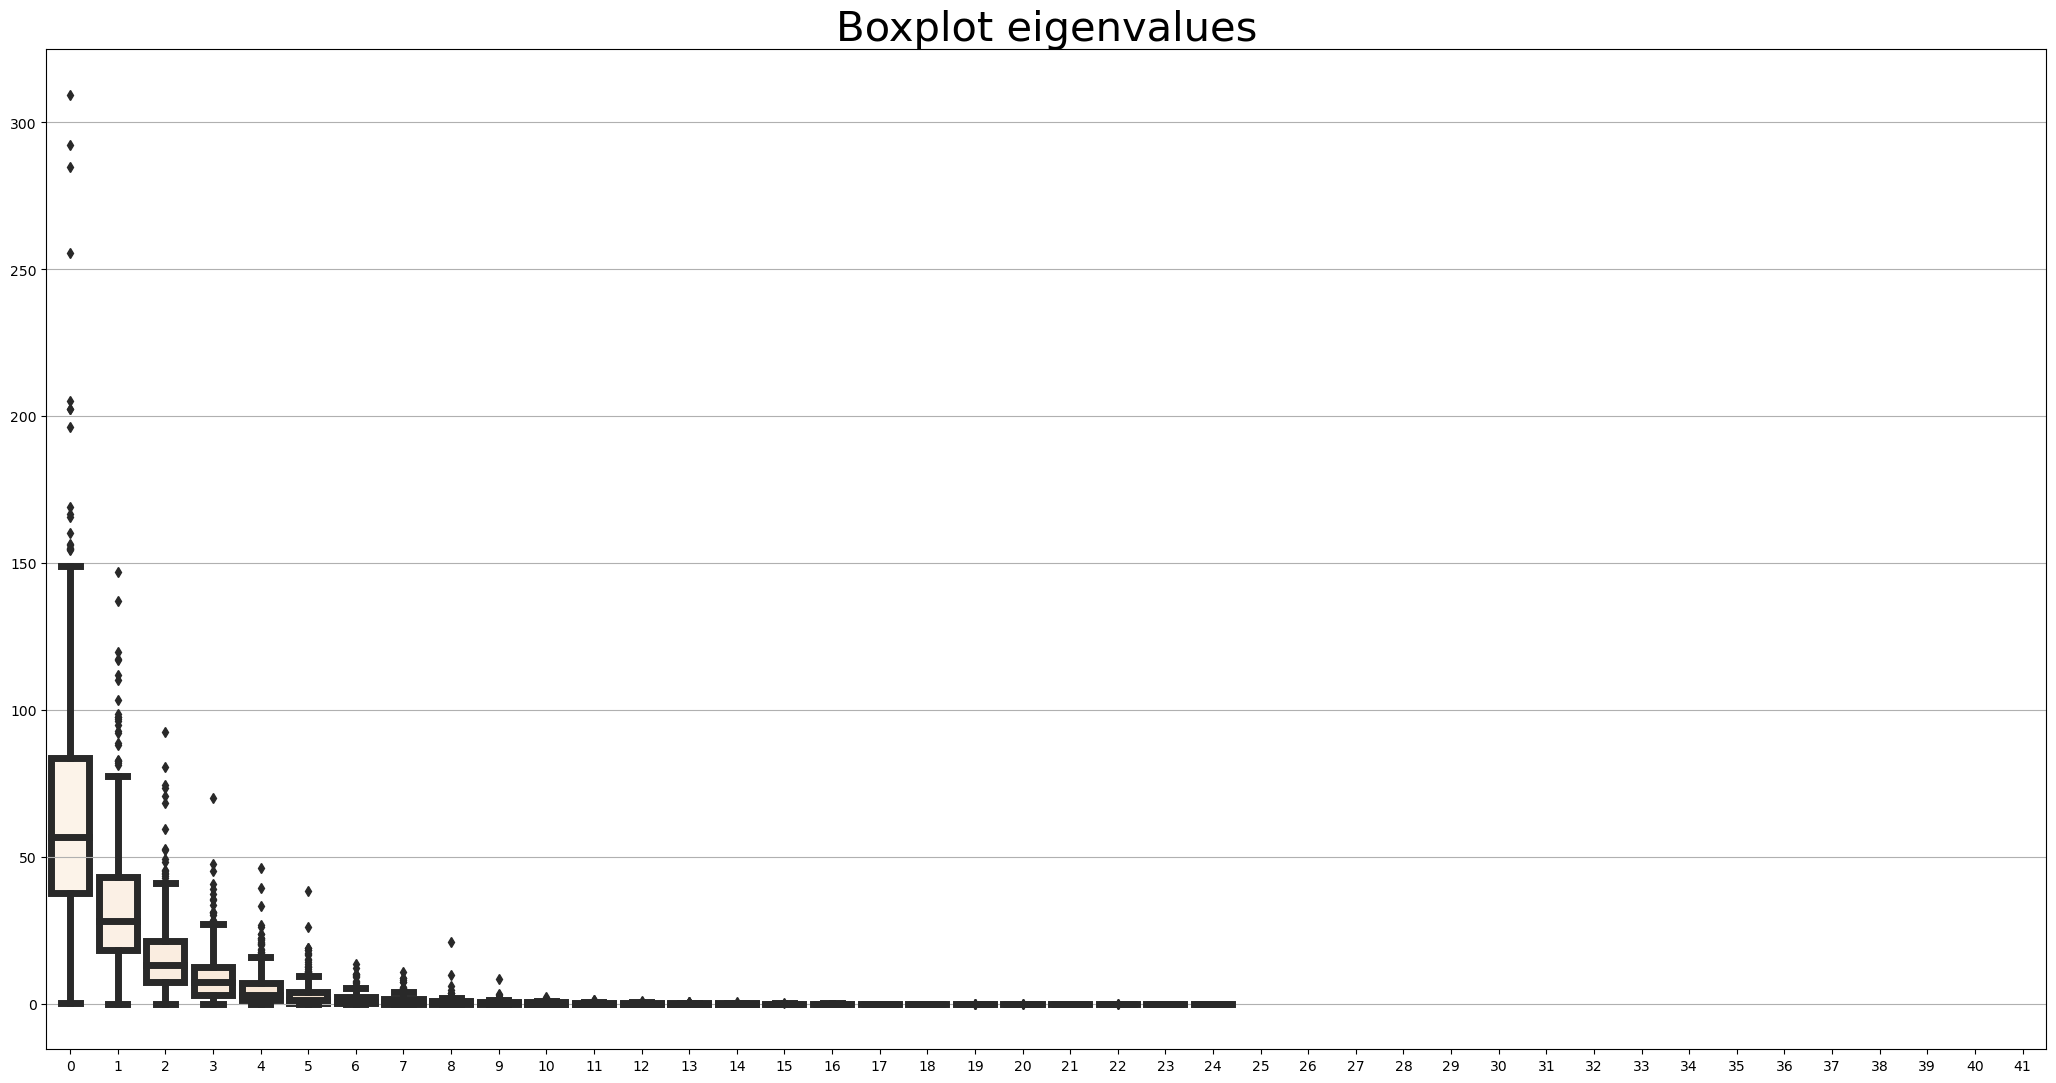

In [ ]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=10)
ax.grid(visible=True)
plt.title("Boxplot eigenvalues",fontsize=30)
bp0 = sns.boxplot(data=lista_eigenvalues,linewidth=5,palette="Oranges")

In [ ]:
s=np.transpose(m)*m

In [ ]:
m_n=normalize_2d(s)

In [ ]:
x, v = np.linalg.eig (m_n)

In [ ]:
x

array([ 8.2198036e-01,  4.4953737e-01,  3.3778334e-01,  9.0338141e-02,
        1.5342963e-03, -1.3962749e-03, -1.1090860e-03,  5.2070891e-04,
       -8.6099935e-05,  2.1168440e-04,  1.3158313e-04,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00], dtype=float32)

In [ ]:
v

array([[-1.8347610e-03,  8.8550820e-04, -2.9179843e-03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-9.8047651e-02,  5.6653398e-01, -8.1549281e-01, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-2.6764369e-01,  7.7380818e-01,  5.7283217e-01, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  1.0000000e+00]], dtype=float32)

In [ ]:
len(v)

42